In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

pd.set_option('display.max_columns', None)

In [71]:
df_charts = pd.read_csv('merge.csv')

df_charts.head()

,date,open_btc,high_btc,low_btc,close_btc,volume_btc,%var_btc,open_sp,high_sp,low_sp,close_sp,volume_sp,%var_sp,close_gd,open_gd,high_gd,low_gd,volume_gd,%var_gd
0,2010-10-14,0.104300,0.112100,0.096892,0.100674,37309,-3.48,1177.82,1178.89,1166.71,1173.81,4969410000,-0.34,1377.6,1372.6,1388.1,1371.1,18498000.0,0.52
1,2010-10-15,0.100721,0.119027,0.096054,0.106360,24754,5.60,1177.47,1181.20,1167.12,1176.19,5724910000,-0.11,1372.0,1381.7,1386.4,1362.7,19683000.0,-0.41
2,2010-10-18,0.105472,0.105889,0.083391,0.101414,25647,-3.85,1176.83,1185.53,1174.55,1184.71,4450050000,0.67,1372.1,1371.0,1375.6,1353.2,13415000.0,0.01
3,2010-10-19,0.101444,0.113090,0.091338,0.098946,6231,-2.46,1178.64,1178.64,1159.71,1165.90,5600120000,-1.08,1336.0,1370.6,1371.7,1328.4,25250000.0,-2.63
4,2010-10-20,0.098890,0.105528,0.082894,0.099331,31793,0.45,1166.74,1182.94,1166.74,1178.17,5027880000,0.98,1344.2,1334.4,1348.1,1331.1,16277000.0,0.61


In [72]:
# Defino las columnas númericas que nos ineteresan para los gráficos de frecuencia que mostraremos

cols_num = df_charts.select_dtypes(include=['number']).columns
cols_num

Index(['open_btc', 'high_btc', 'low_btc', 'close_btc', 'volume_btc',
       '%var_btc', 'open_sp', 'high_sp', 'low_sp', 'close_sp', 'volume_sp',
       '%var_sp', 'close_gd', 'open_gd', 'high_gd', 'low_gd', 'volume_gd',
       '%var_gd'],
      dtype='object')

C:\Users\sergi\AppData\Local\Temp\ipykernel_37388\842955165.py:3: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_charts['date'] = pd.to_datetime(df_charts['date'], errors='coerce', dayfirst=True)  # usa dayfirst si es dd/mm/yyyy


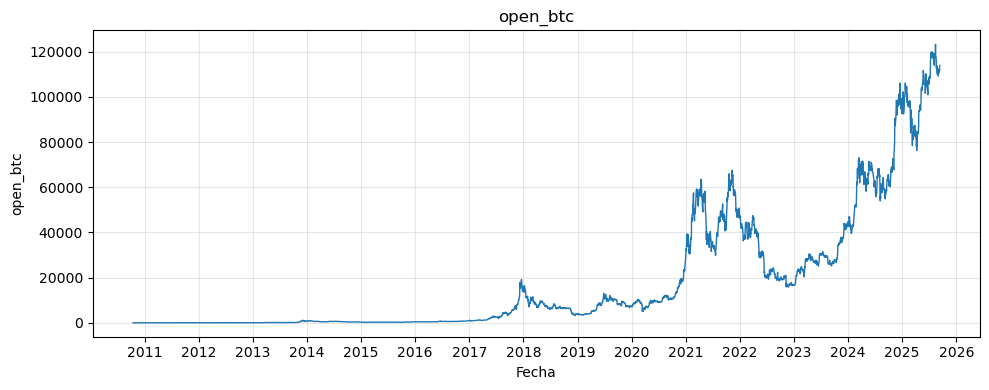

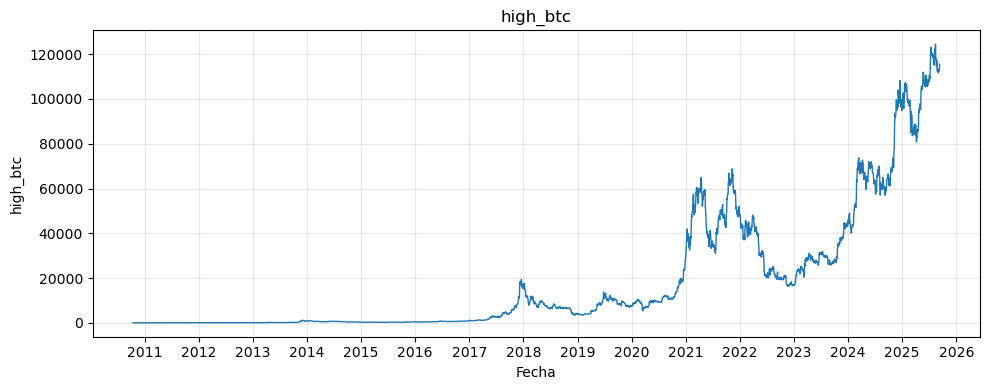

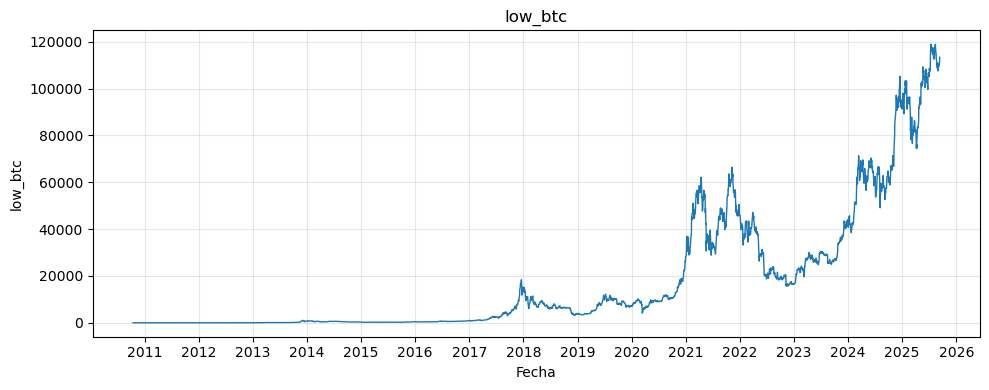

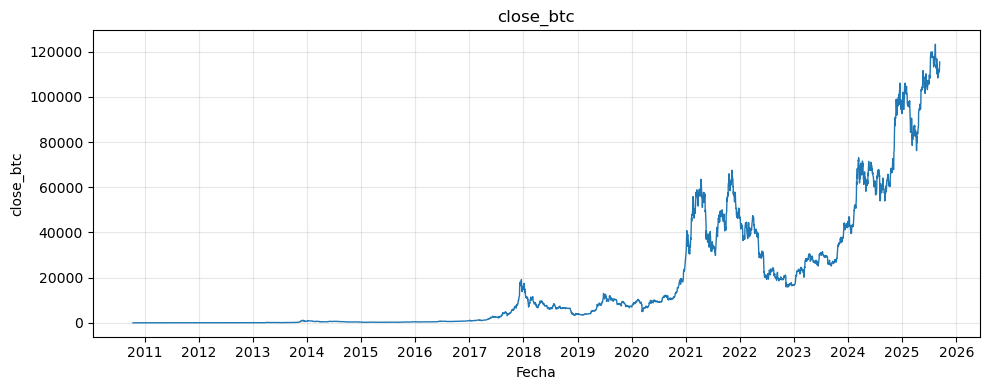

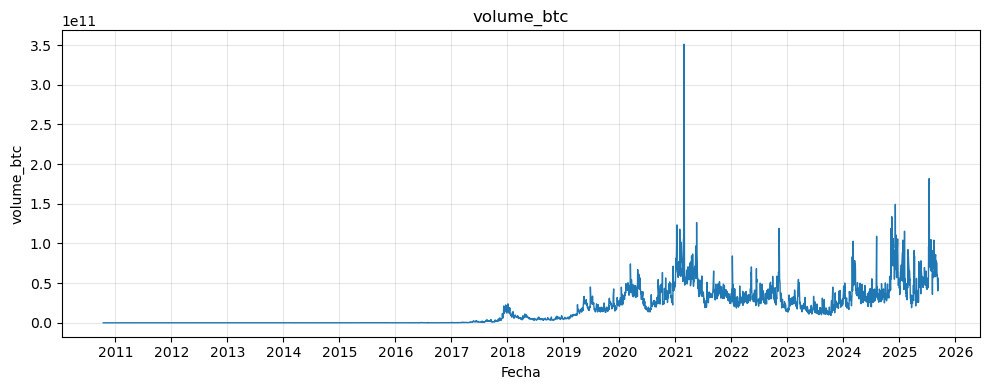

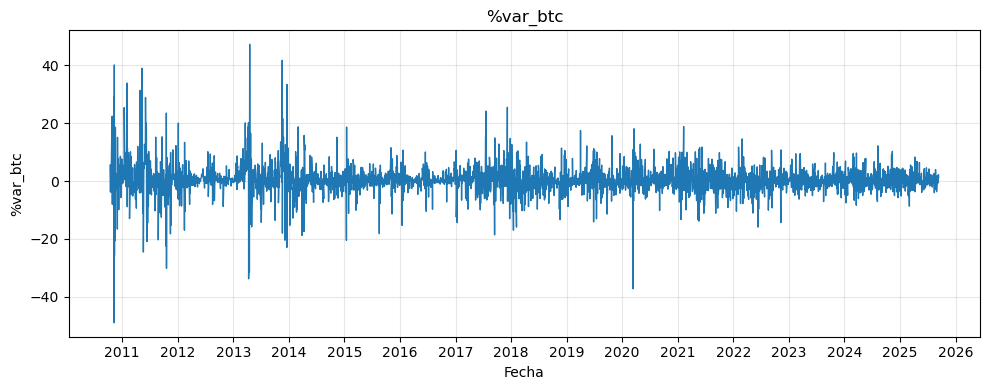

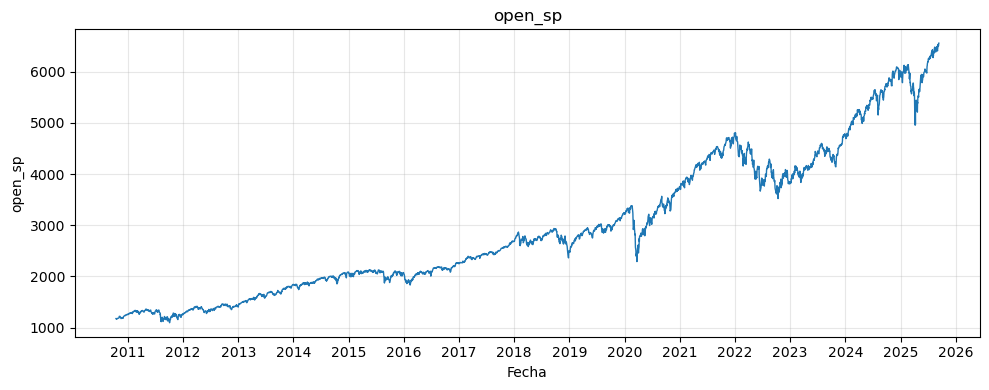

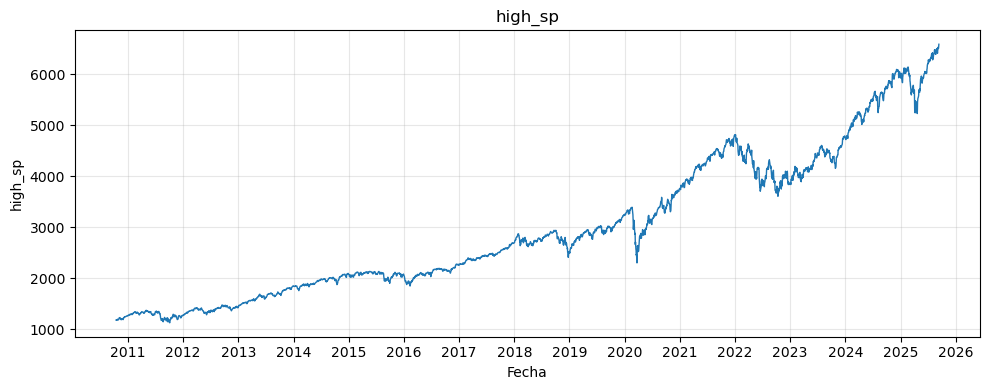

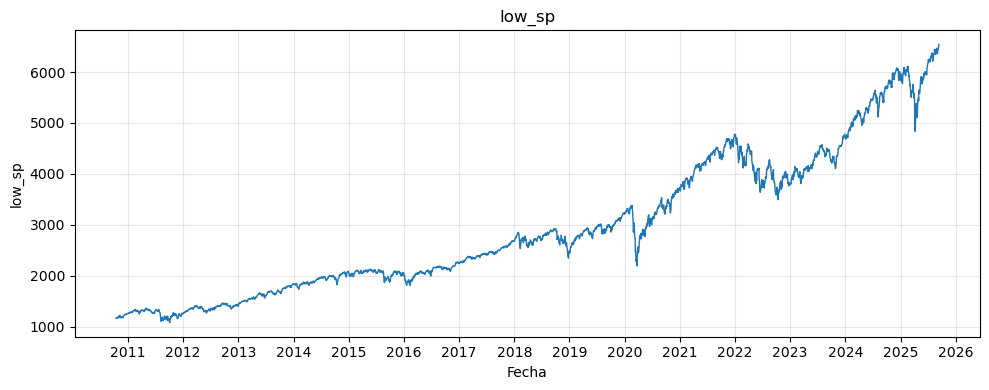

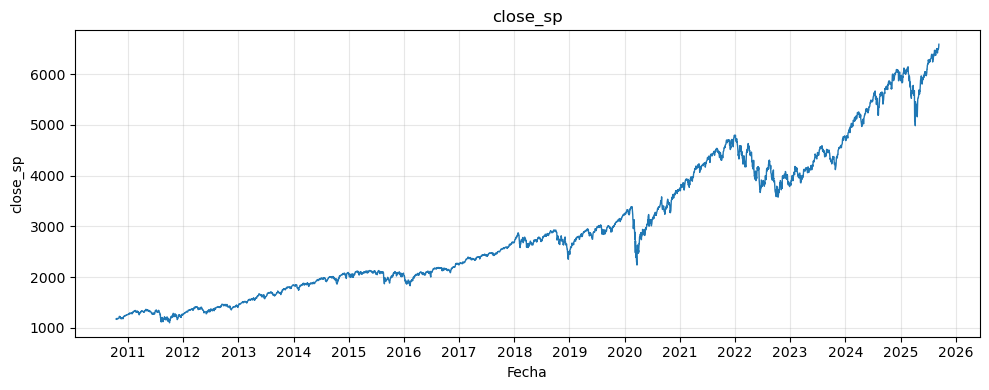

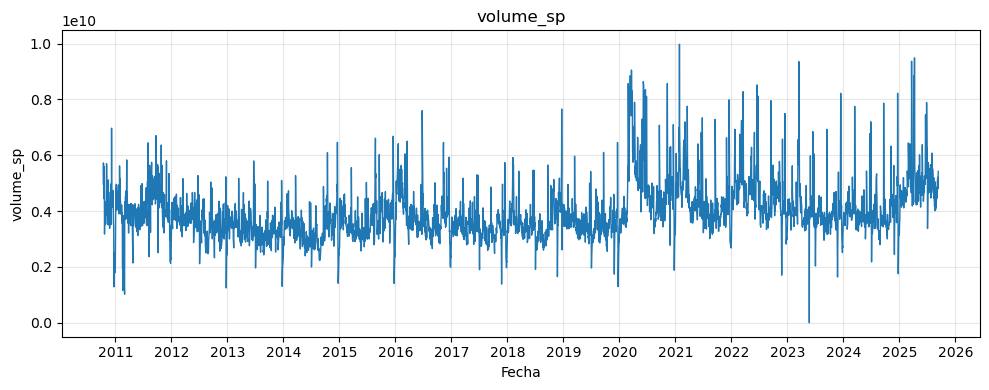

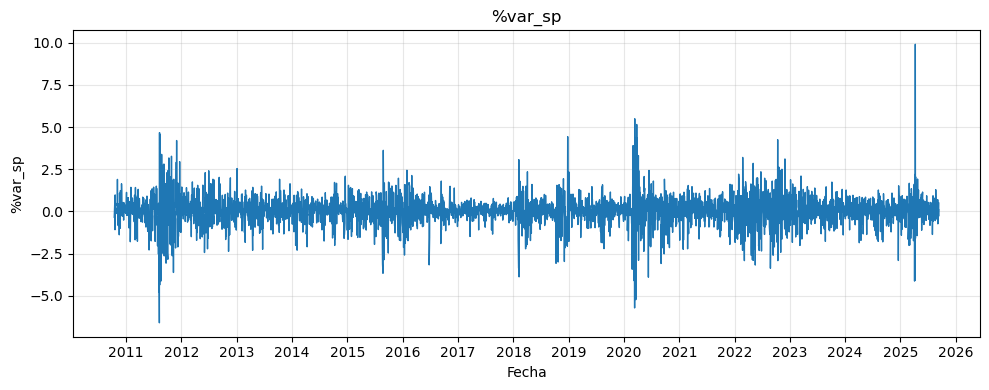

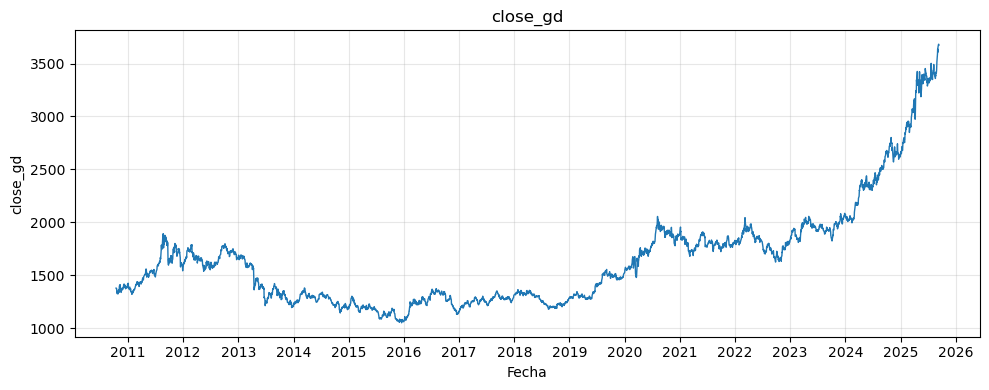

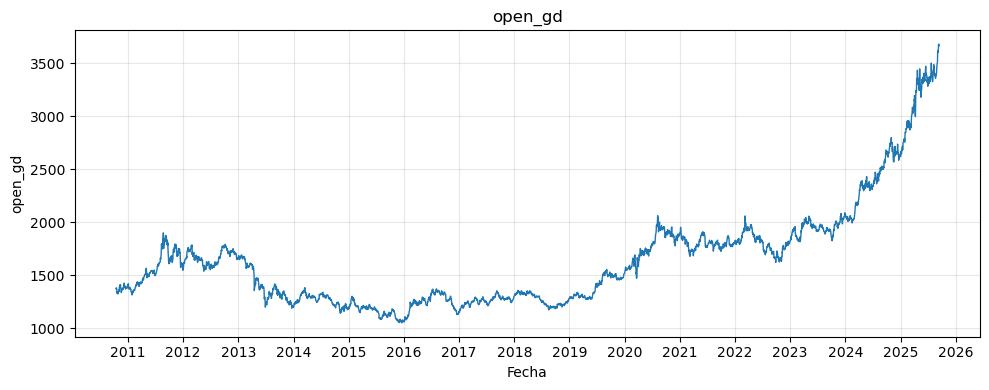

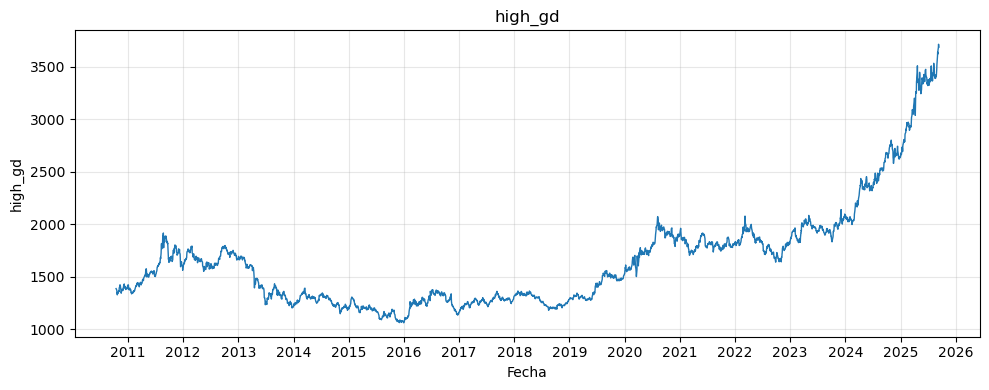

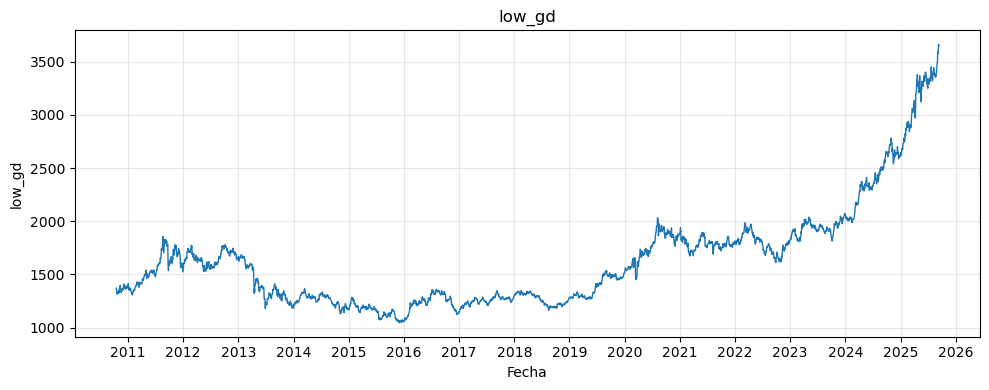

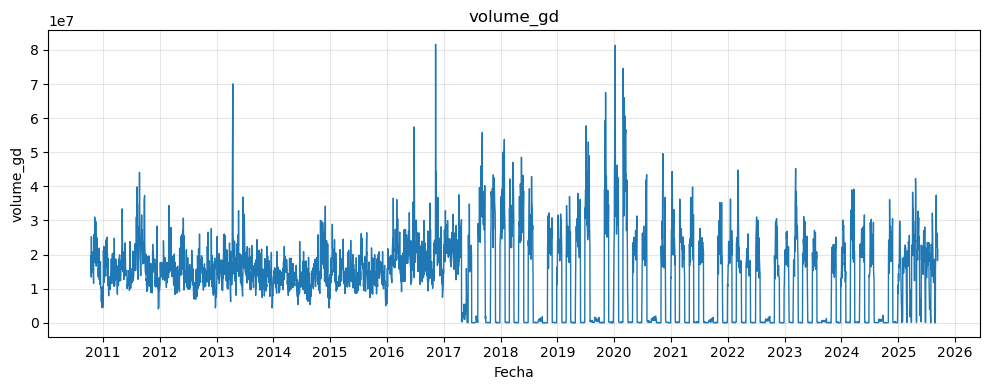

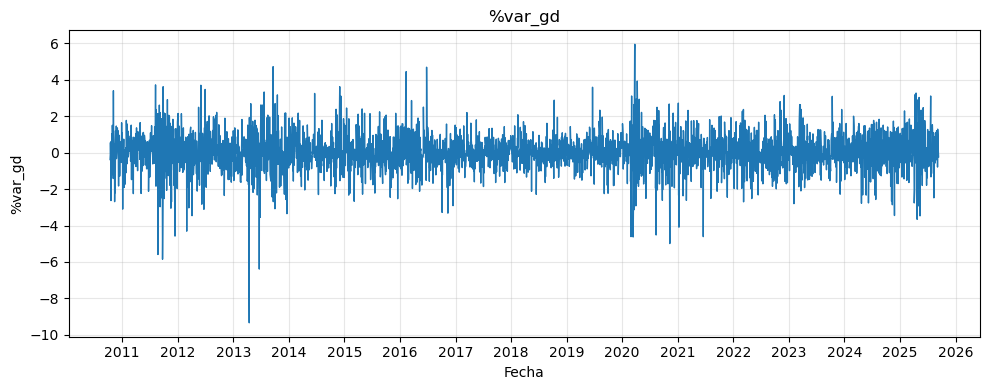

In [73]:

# columnas numéricas excepto 'date'
# Convertir a datetime indicando el formato correcto de tus fechas
df_charts['date'] = pd.to_datetime(df_charts['date'], errors='coerce', dayfirst=True)  # usa dayfirst si es dd/mm/yyyy

# Ordenar por fecha
df = df_charts.sort_values('date')

num_cols = df_charts.select_dtypes(include=np.number).columns.tolist()

for col in num_cols:
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(df_charts['date'], df_charts[col], linewidth=1)
    ax.set_title(col)
    ax.set_xlabel('Fecha'); ax.set_ylabel(col)
    ax.xaxis.set_major_locator(mdates.YearLocator())          # cada año
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # mostrar como '2010', '2011', etc.
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


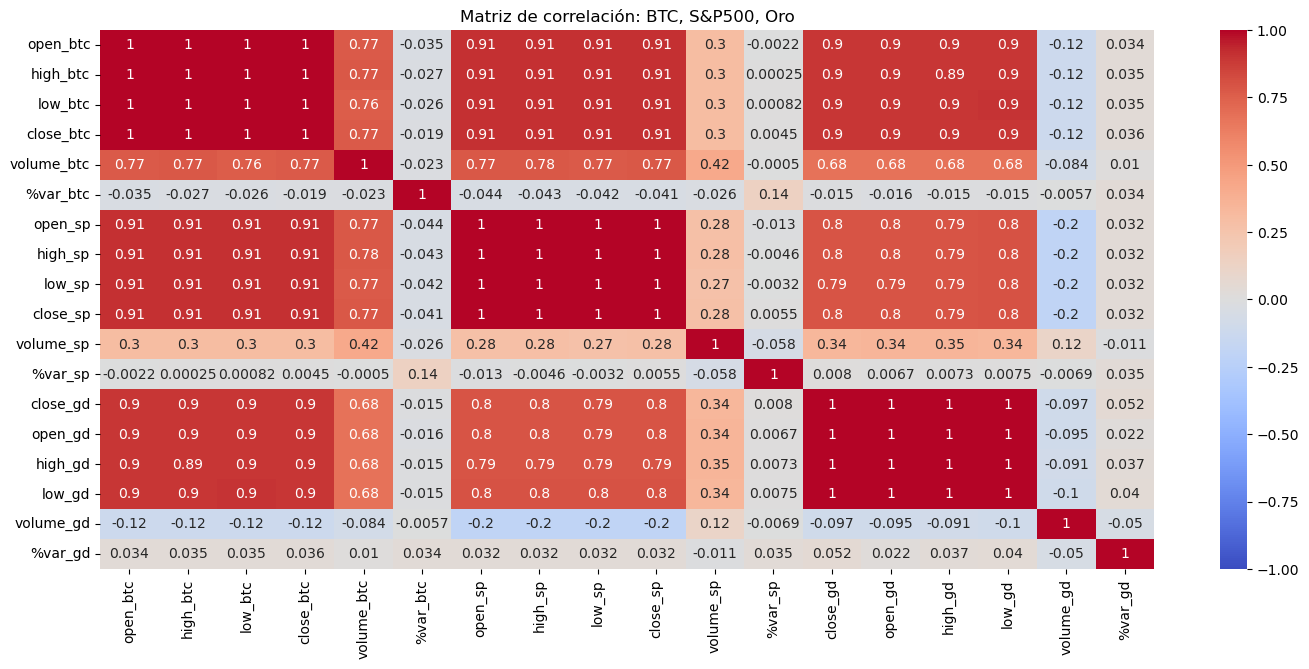

In [74]:
# Calcula la matriz de correlación excluyendo la columna 'date'
plt.figure(figsize=(17,7))
sns.heatmap(df_charts.drop(columns=['date'], errors='ignore').corr(),
    annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de correlación: BTC, S&P500, Oro")
plt.show()

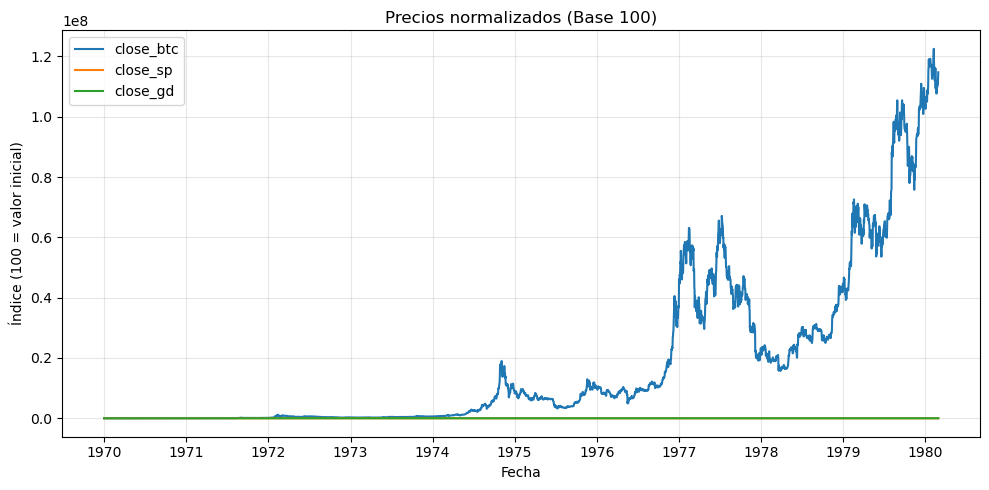

In [ ]:
df_close = df_charts[['close_btc', 'close_sp', 'close_gd']]


# 3) Usa como base la primera fila sin nulos simultáneos
base = df_close.dropna().iloc[0]           # valores iniciales por columna
df_norm = df_close.div(base, axis=1) * 100 # base 100

# 4) Graficar
#ax.plot(df_charts['date'], df_charts[col], linewidth=1)
ax = df_norm.plot(figsize=(10,5))
ax.set_title("Precios normalizados (Base 100)")
ax.set_ylabel("Índice (100 = valor inicial)")
ax.set_xlabel('Fecha')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()


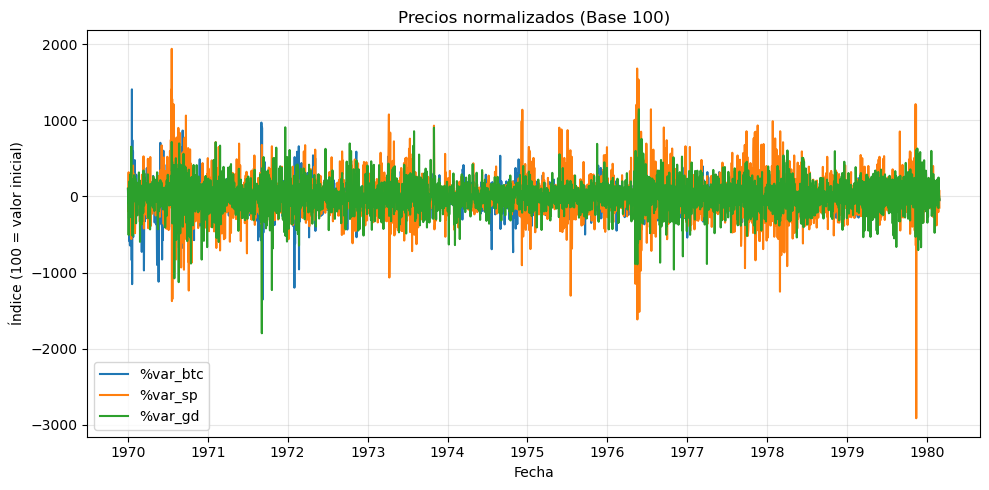

In [106]:
df_var = df_charts[['%var_btc', '%var_sp', '%var_gd']]


# 3) Usa como base la primera fila sin nulos simultáneos
base2 = df_var.dropna().iloc[0]           # valores iniciales por columna
df_norm2 = df_var.div(base2, axis=1) * 100 # base 100

# 4) Graficar
ax = df_norm2.plot(figsize=(10,5))
ax.set_title("Precios normalizados (Base 100)")
ax.set_ylabel("Índice (100 = valor inicial)")
ax.set_xlabel('Fecha')
ax.xaxis.set_major_locator(mdates.YearLocator())  
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

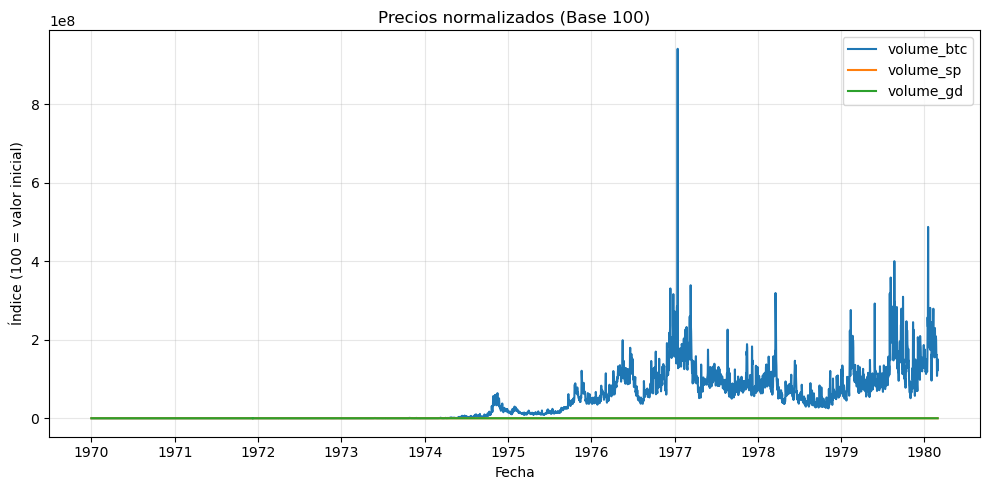

In [107]:
df_volume = df_charts[['volume_btc', 'volume_sp', 'volume_gd']]


# 3) Usa como base la primera fila sin nulos simultáneos
base3 = df_volume.dropna().iloc[0]           # valores iniciales por columna
df_norm = df_volume.div(base3, axis=1) * 100 # base 100

# 4) Graficar
ax = df_norm.plot(figsize=(10,5))
ax.set_title("Precios normalizados (Base 100)")
ax.set_ylabel("Índice (100 = valor inicial)")
ax.set_xlabel('Fecha')
ax.xaxis.set_major_locator(mdates.YearLocator())  
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

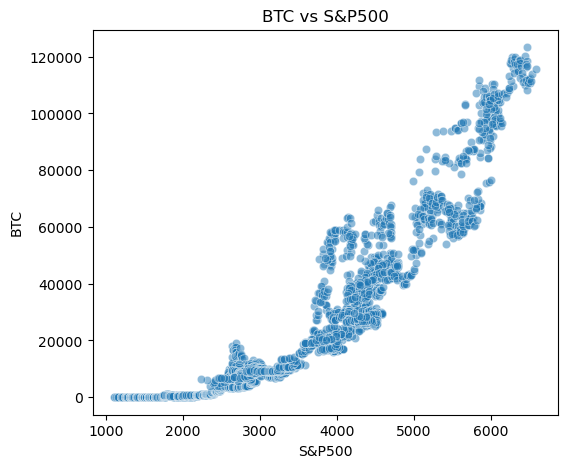

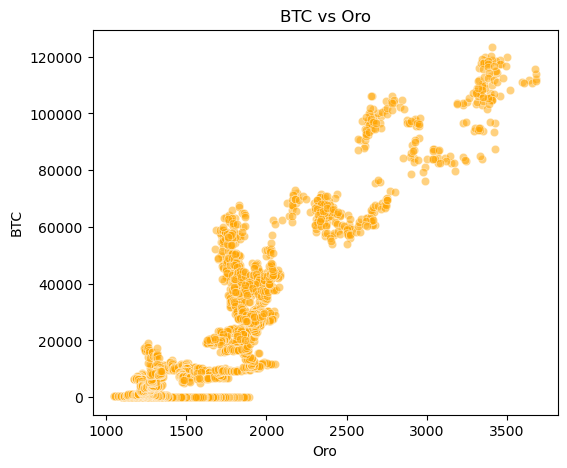

In [80]:
# BTC vs S&P
plt.figure(figsize=(6,5))
sns.scatterplot(x=df_charts['close_sp'], y=df_charts['close_btc'], alpha=0.5)
plt.title("BTC vs S&P500")
plt.xlabel("S&P500")
plt.ylabel("BTC")
plt.show()

# BTC vs Oro
plt.figure(figsize=(6,5))
sns.scatterplot(x=df_charts['close_gd'], y=df_charts['close_btc'], alpha=0.5, color='orange')
plt.title("BTC vs Oro")
plt.xlabel("Oro")
plt.ylabel("BTC")
plt.show()
